In [1]:
# Import necessary libraries
import yfinance as yf 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# Define a function for plotting graphs
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of stock")

In [3]:
# Fetch stock data for the past 20 years
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)
stock = "MSFT"
stock_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Display basic data information
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-07-26,28.360001,28.709999,28.200001,28.660000,17.859989,72387600
2004-07-27,28.700001,28.760000,28.129999,28.440001,17.722889,72968400
2004-07-28,28.340000,28.790001,28.280001,28.580000,17.810141,62718800
2004-07-29,28.780001,28.799999,28.250000,28.480000,17.747826,60148400
2004-07-30,28.450001,28.809999,28.330000,28.490000,17.754049,59552900


In [5]:
stock_data.shape

(5034, 6)

In [6]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,99.577114,100.538290,98.588644,99.610253,93.536835,4.527035e+07
std,108.333076,109.345168,107.257544,108.369407,109.416762,2.840089e+07
min,15.200000,15.620000,14.870000,15.150000,11.263444,7.425600e+06
25%,27.650000,27.900000,27.370001,27.652500,20.543364,2.562038e+07
50%,41.620001,41.970001,41.320002,41.680000,35.776011,3.802000e+07
75%,136.595005,137.297501,135.015003,136.235004,130.239777,5.728965e+07
max,467.000000,468.350006,464.459991,467.559998,467.559998,5.910522e+08


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-07-26 to 2024-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [8]:
stock_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing price of stock')

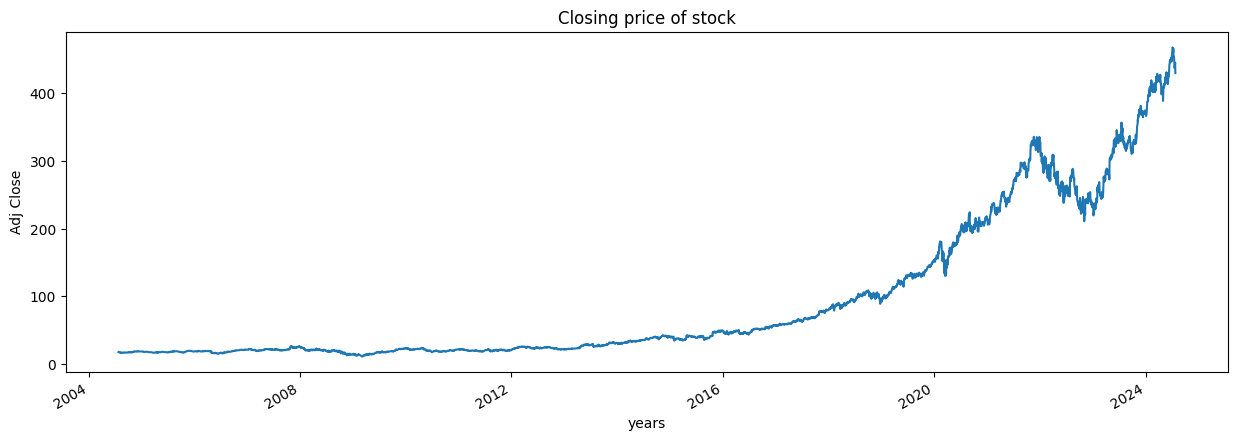

In [9]:
# Plot the adjusted closing price
plt.figure(figsize = (15,5))
stock_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of stock")

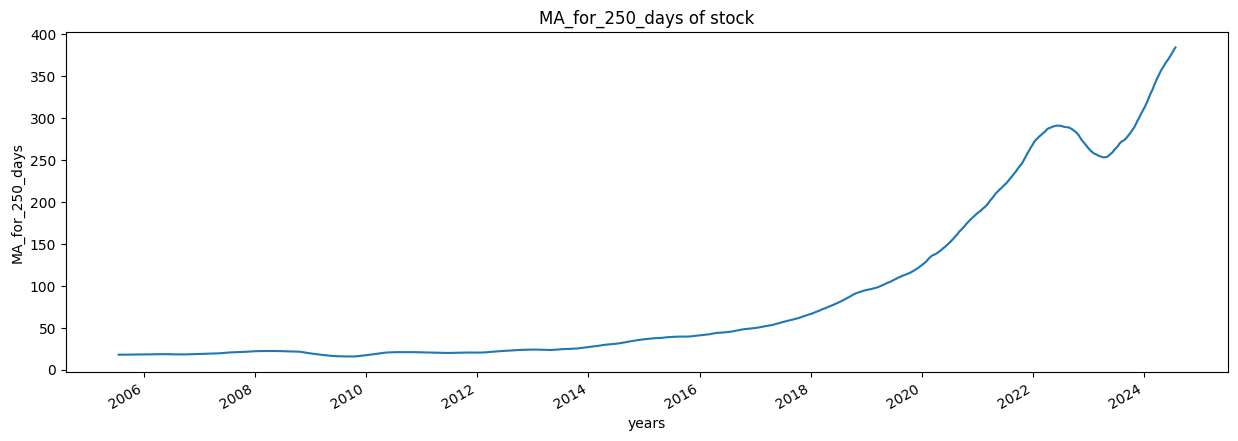

In [10]:
# Calculate and plot moving averages
stock_data['MA_for_250_days'] = stock_data['Adj Close'].rolling(250).mean()
plot_graph((15,5), stock_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

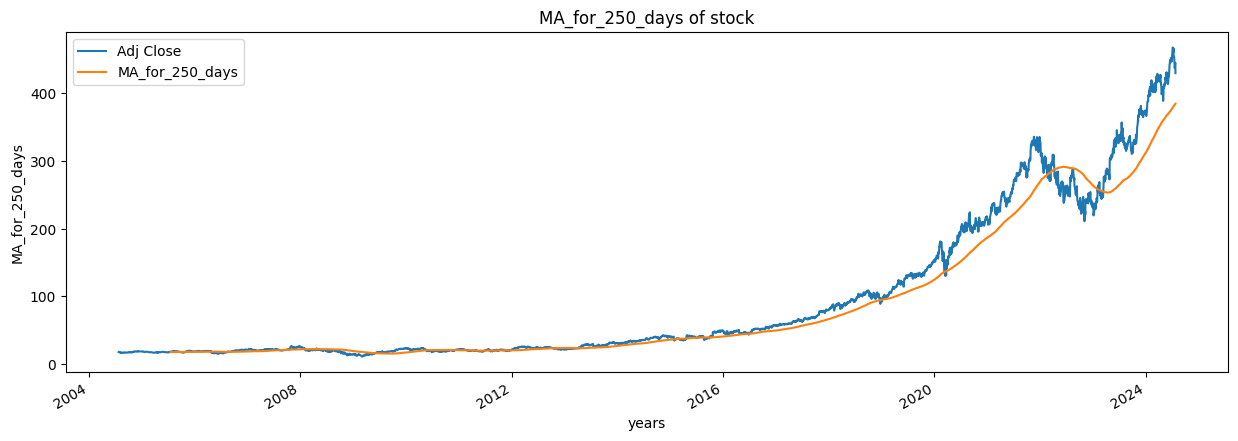

In [11]:
plot_graph((15,5), stock_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

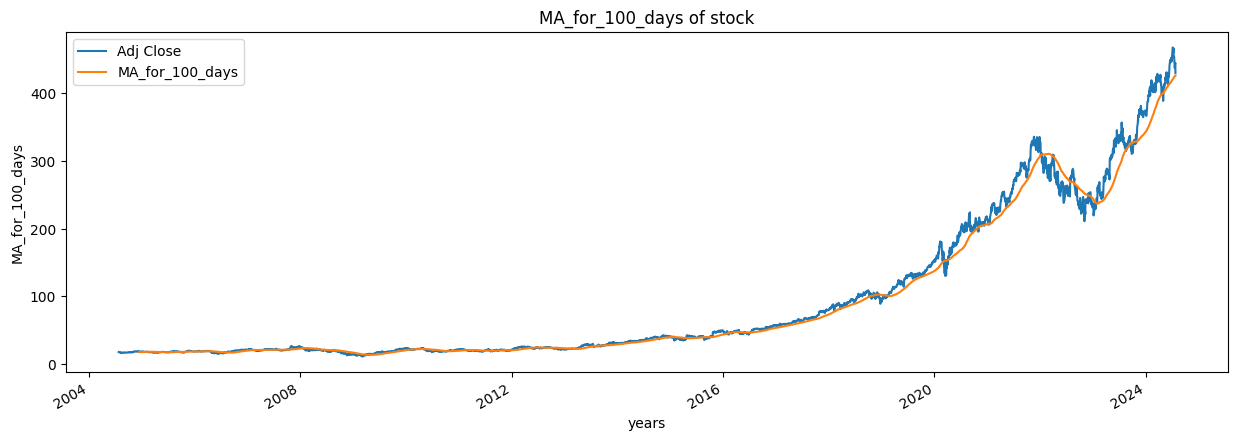

In [12]:
stock_data['MA_for_100_days'] = stock_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), stock_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

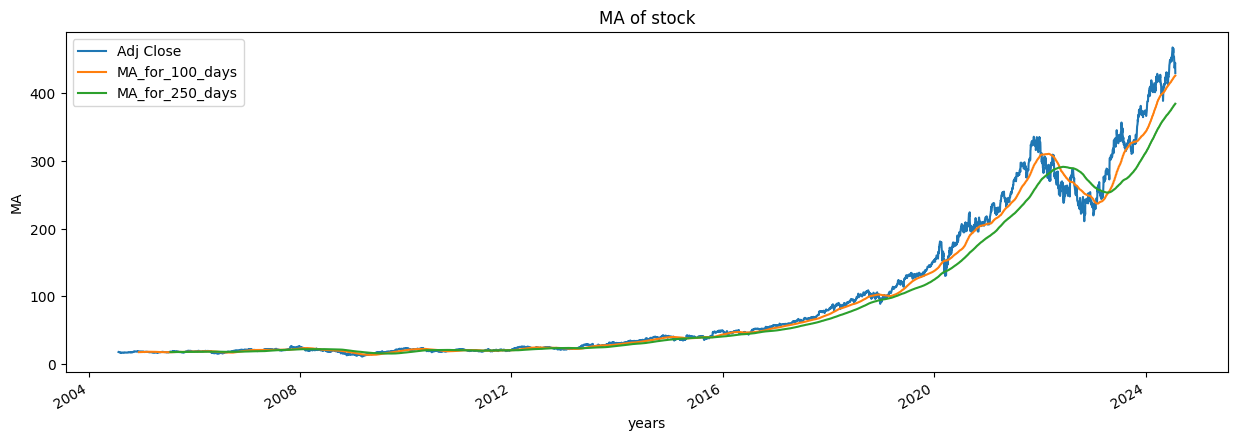

In [13]:
plot_graph((15,5), stock_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [14]:
# Calculate percentage change and plot it
stock_data['percentage_change_cp'] = stock_data['Adj Close'].pct_change()
stock_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-07-26,17.859989,NaN
2004-07-27,17.722889,-0.007676
2004-07-28,17.810141,0.004923
2004-07-29,17.747826,-0.003499
2004-07-30,17.754049,0.000351


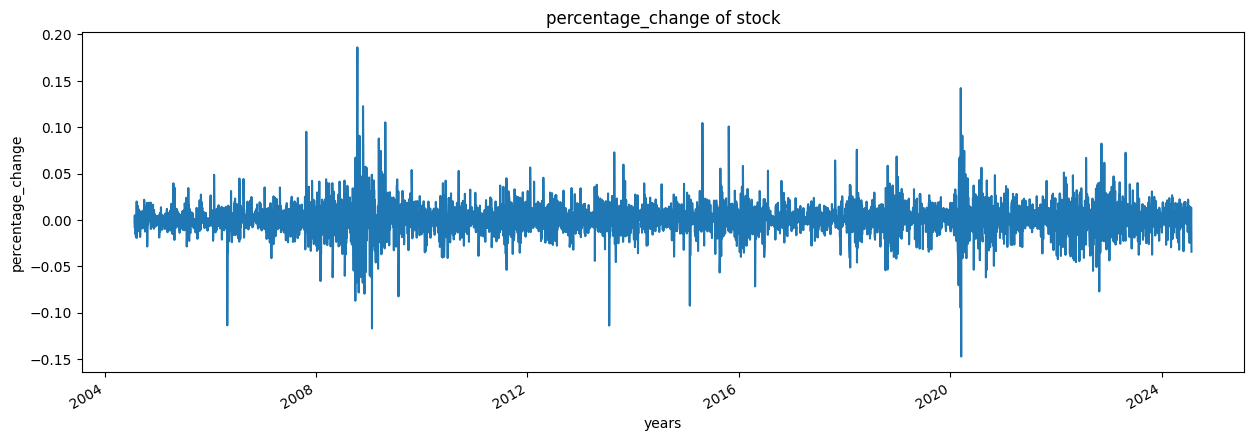

In [15]:
plot_graph((15,5), stock_data['percentage_change_cp'], 'percentage_change')

In [16]:
# Normalize the adjusted close price
Adj_close_price = stock_data[['Adj Close']]

In [17]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([467.55999756]), array([11.26344395]))

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01445671],
       [0.01415624],
       [0.01434746],
       ...,
       [0.94604387],
       [0.95022975],
       [0.9167756 ]])

In [19]:
len(scaled_data)

5034

In [20]:
# Prepare the data for LSTM
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [21]:
x_data[0], y_data[0]

(array([[0.01445671],
        [0.01415624],
        [0.01434746],
        [0.01421089],
        [0.01422453],
        [0.01426551],
        [0.01365094],
        [0.0136373 ],
        [0.01291347],
        [0.01238085],
        [0.01243547],
        [0.01317295],
        [0.01274958],
        [0.01202575],
        [0.01221697],
        [0.01231256],
        [0.01225793],
        [0.01281785],
        [0.01235353],
        [0.01246278],
        [0.01262717],
        [0.01262717],
        [0.01305176],
        [0.0129011 ],
        [0.01292849],
        [0.01270934],
        [0.01270934],
        [0.01283261],
        [0.01314765],
        [0.01244908],
        [0.01279153],
        [0.01265456],
        [0.01268195],
        [0.01296958],
        [0.01264084],
        [0.0129011 ],
        [0.01255866],
        [0.01265456],
        [0.01299698],
        [0.01299698],
        [0.01265456],
        [0.01246278],
        [0.01277783],
        [0.01269562],
        [0.01255866],
        [0

In [22]:
splitting_len = int(len(x_data) * 0.7)
x_train, y_train = x_data[:splitting_len], y_data[:splitting_len]
x_test, y_test = x_data[splitting_len:], y_data[splitting_len:]

In [23]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (3453, 100, 1)
y_train shape: (3453, 1)
x_test shape: (1481, 100, 1)
y_test shape: (1481, 1)


In [25]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 60s 17ms/step - loss: 1.1141e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 58s 17ms/step - loss: 4.4741e-05


In [28]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [29]:
# Make predictions
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [30]:
predictions

array([[0.20155998],
       [0.20163253],
       [0.19927719],
       ...,
       [0.90422606],
       [0.90477926],
       [0.9075941 ]], dtype=float32)

In [31]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[103.234566],
       [103.26768 ],
       [102.19294 ],
       ...,
       [423.85867 ],
       [424.1111  ],
       [425.3955  ]], dtype=float32)

In [32]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[105.23841095],
       [102.20495605],
       [102.44046783],
       ...,
       [442.94000244],
       [444.8500061 ],
       [429.58499146]])

In [33]:
# Calculate RMSE
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test) ** 2))
print(f"RMSE: {rmse}")

RMSE: 7.644385756970841


In [34]:
# Prepare plotting data
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = stock_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-09-04,105.238411,103.234566
2018-09-05,102.204956,103.267677
2018-09-06,102.440468,102.192940
2018-09-07,101.941170,101.341034
2018-09-10,103.043404,100.742973


<Figure size 640x480 with 0 Axes>

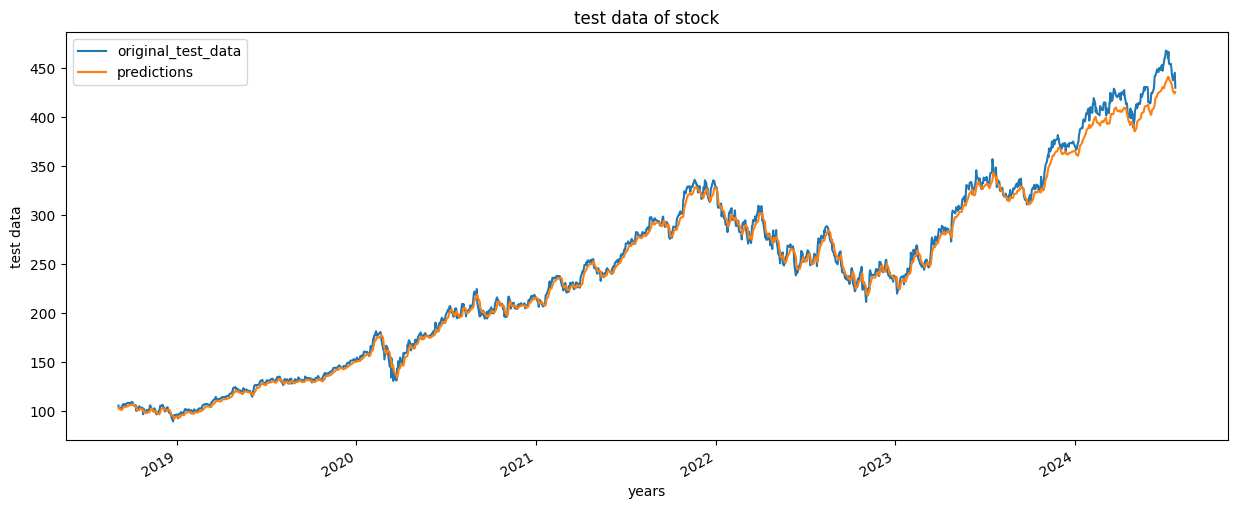

In [35]:
# Plot the results
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

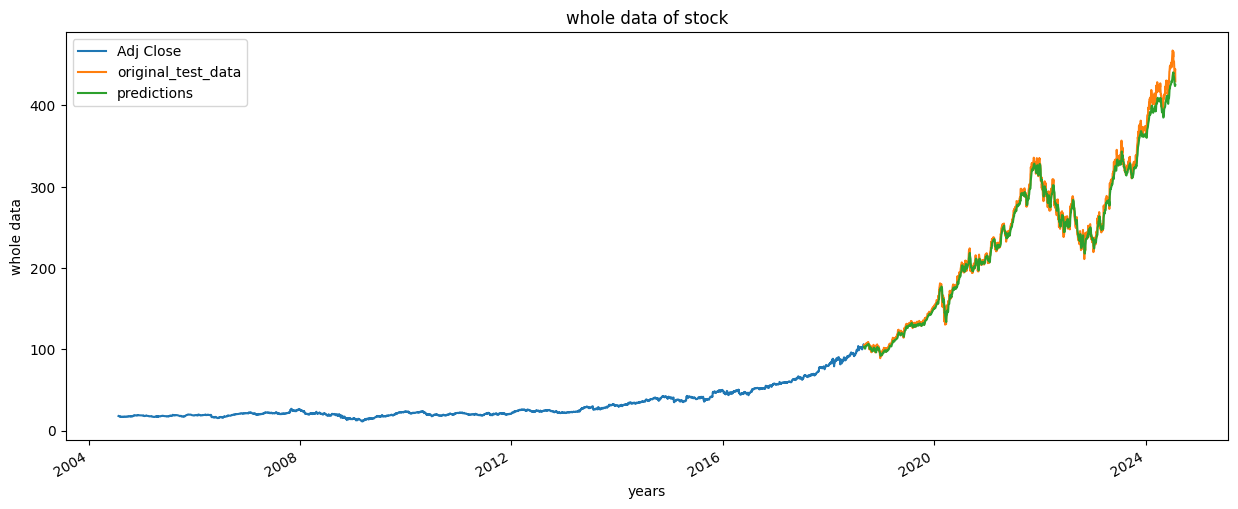

In [36]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [37]:
# Save the model
model.save("stock_price_prediction_model.keras")